In [1]:
import librosa
import numpy as np
import seaborn as sns
import librosa.display
from constants import *
import IPython.display as ipd
import matplotlib.pyplot as plt

In [ ]:
gtr, _ = librosa.load("dataset/gtr/gtr_13.wav", mono=True, sr=SR)
ney, _ = librosa.load("dataset/ney/ney_13.wav", mono=True, sr=SR)
print(gtr.shape, ney.shape)

(96000,) (96000,)


In [17]:
ipd.Audio(gtr, rate=SR)

In [18]:
ipd.Audio(ney, rate=SR)

In [19]:
stft_gtr = librosa.stft(gtr, n_fft=N_FFT, hop_length=HOP)
stft_ney = librosa.stft(ney, n_fft=N_FFT, hop_length=HOP)
print("STFT gtr:", stft_gtr.shape)
print("STFT ney:", stft_ney.shape)
magnitude_gtr = np.abs(stft_gtr)
magnitude_ney = np.abs(stft_ney)
phase_gtr = np.angle(stft_gtr)
phase_ney = np.angle(stft_ney)
db_gtr = librosa.amplitude_to_db(magnitude_gtr)
db_ney = librosa.amplitude_to_db(magnitude_ney)

STFT gtr: (512, 1501)
STFT ney: (512, 1501)


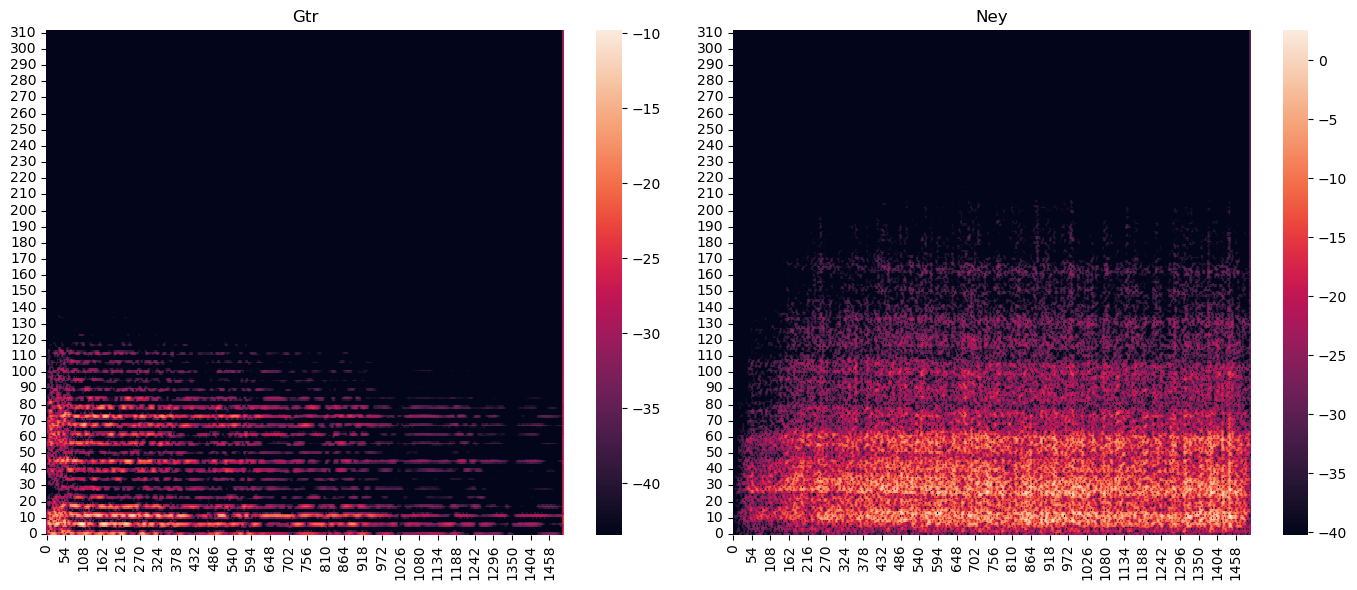

In [21]:
figure, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(db_gtr[200:], ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Gtr")

sns.heatmap(db_ney[200:], ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title("Ney")

plt.tight_layout()
plt.show()

In [23]:
y_inv = librosa.griffinlim(magnitude_gtr, n_iter=64, n_fft=N_FFT,
                           hop_length=HOP, random_state=42)
ipd.Audio(y_inv, rate=SR)

In [24]:
y_inv = librosa.griffinlim(
    magnitude_gtr, n_iter=128, n_fft=N_FFT, hop_length=HOP, random_state=42)
ipd.Audio(y_inv, rate=SR)

In [25]:
y_inv = librosa.griffinlim(
    magnitude_gtr, n_iter=256, n_fft=N_FFT, hop_length=HOP, random_state=42)
ipd.Audio(y_inv, rate=SR)